# Data Analyst Nanodegree
## Intro to Data Analysis
## Project: Investigate a Dataset
----

# Getting Started

To begin working with the Titanic passenger data, we'll first need to import the functionality we need, and load our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# %matplotlib inline # Pretty display for notebooks

csv_file = "titanic_data.csv"
data = pd.read_csv(csv_file) #csv파일 불러오기

data.head() #상위 5개만 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And here is a list of features:

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

And then, we can make a function of survival percentage for each feature.

In [2]:
def filter_data(data, condition):
    field, operator, value = condition.split(" ", 2) #공백으로. default가 공백.
    #파라미터로 숫자를 적어주면, 뒤에 공백이 여러개 있어도 각 앞부터 공백 단위로 잘라 넣는다.
    
    #field
    if field not in data.columns.values: #필드값이 없으면 오류
        raise Exception("'{}' is not a feature of the dataframe.".format(field))
    if " " in value: #값에 공백 있으면 오류
        raise Exception("'{}' is uncorrect value.".format(value))
        
    #value
    try:
        value = float(value)
    except:
        value = value.strip("\'\"") #strip문자열 양쪽 공백을 모두 지운다. default가 공백
        #파라미터로 특정 문자를 지정하면, 그것을 지운다.
    
    #operator
    if operator == ">":
        matches = data[field] > value
    elif operator == "<":
        matches = data[field] < value
    elif operator == ">=":
        matches = data[field] >= value
    elif operator == "<=":
        matches = data[field] <= value
    elif operator == "==":
        matches = data[field] == value
    elif operator == "!=":
        matches = data[field] != value
    else:
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    #T/F로 반환한다. 따라서 여기서 True 된 것으로 다시 DataFrame 생성해야.
    
    data = data[matches].reset_index(drop = True)
    #reset_index로 이전에 있던 인덱스를 새로운 열로 생성되어 삽입되고(가장 첫째 열에 들어간다.) 인덱스를 새로 만들어 부여한다.
    #drop=True로 설정하면 이전 인덱스를 버린다.
    
    return data

In [3]:
def filtered_data(data, filters = []):
    for condition in filters: #ex) ["Pclass == 1", "Age < 22"]
        data = filter_data(data, condition)
        
    return data

In [4]:
filtered_data(data, ["Pclass == 1", "Age < 15"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
1,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
3,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
4,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S


It works well. But, chart will help to understand the data. Let's implement plot function.

In [5]:
def show_plot(data, key = "", filters = [], **kwargs):
    #*args, **kwargs : 파라미터를 몇 개 받을 지 모르는 경우 설정.
    #*args : 파라미터를 몇개를 받을지 모르는 경우 사용한다. args 는 튜플 형태로 전달된다.
    #**kwargs : 파라미터 명을 같이 보낼 수 있다. kwargs는 딕셔너리 형태로 전달된다.
    #http://jhproject.tistory.com/109
    
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values:
        raise Exception("'{}' is not a feature of the dataframe".format(key))
        
    if sum(pd.isnull(data[key])) != 0:
        data = data[~np.isnan(data[key])] #NaN이 아닌 값을 불러와서 다시 데이터 프레임에 삽입 = NaN 제거
    
    data = filtered_data(data, filters)
    plt.figure(figsize=(8,6)) #https://matplotlib.org/api/figure_api.html
    #기본적 설정. 서브 프레임을 만들거나, 크기를 바꾸는 등의 설정을 하는 데 사용한다.
    
    if key == "Age" or key == "Fare": #키가 숫자로 되어 있을 경우. 히스토그램
        if kwargs and 'n_bins' in kwargs and 'bin_width' in kwargs: #함께 쓸 수 없다.
            raise Exception("Arguments 'n_bins' and 'bin_width' cannot be used simultaneously.")

        min_value = data[key].min()
        max_value = data[key].max()
        value_range = max_value - min_value
        n_bins = 10
        bin_width = float(value_range) / n_bins

        #기본값 외에 따로 설정한 옵션이 있으면 적용
        if kwargs and 'n_bins' in kwargs: #kwargs(추가 옵션)이 존재하고 그 옵션 중에 "n_bins"가 있을 시
            n_bins = int(kwargs['n_bins'])
            bin_width = float(value_range) / n_bins
        elif kwargs and 'bin_width' in kwargs:
            bin_width = kwargs['bin_width'] #kwargs(추가 옵션)이 존재하고 그 옵션 중에 "bin_width"가 있을 시
            n_bins = int(np.ceil(float(value_range) / bin_width))
        
        if kwargs and 'boundary' in kwargs: #kwargs(추가 옵션)이 존재하고 그 옵션 중에 "boundary"가 있을 시
            bound_factor = np.floor(( min_value - kwargs['boundary'] ) / bin_width)
            min_value = kwargs['boundary'] + bound_factor * bin_width
            if min_value + n_bins * bin_width <= max_value:
                n_bins += 1
                
        bins = np.arange(0, data[key].max() + 10, 10) #히스토그램 각 막대의 단위
    
        nonsurv_vals = data[data['Survived'] == 0][key].reset_index(drop = True)
        #data에서 사망 + key값으로 데이터 가져오기.
        surv_vals = data[data['Survived'] == 1][key].reset_index(drop = True)
        #data에서 생존 + key값으로 데이터 가져오기.
        
        #reset_index로 이전에 있던 인덱스를 새로운 열로 생성되어 삽입되고(가장 첫째 열에 들어간다.) 인덱스를 새로 만들어 부여한다.
        #drop=True로 설정하면 이전 인덱스를 버린다.
        
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6, color = 'r')
        plt.hist(surv_vals, bins = bins, alpha = 0.6, color = 'g')
        
    else: #키가 카테고리 인 경우
        values = np.sort(data[key].unique()) #x축 범례 만들기 위해 데이터 변형 전 미리 저장
        
        data['count'] = 1 #각 행에 count라는 열 추가하고 값을 1로 넣는다.
        data = data.groupby([data[key], data["Survived"]], as_index = False).count()
        #groupby : 해당 키로 그룹을 생성한다. 그 뒤 count(), describe()등으로 세부 정보 확인 가능 
        #as_index = False를 하지 않으면 키가 색인으로 된다.
        #count함수로 각 그룹의 수를 세는데, count 열을 생성 했기에 이 값이 count 열에도 적용된다.

        levels = data[key].unique() #중복되지 않는 키 값의 배열. 키의 카테고리 배열.
        n_levels = len(levels) #카테고리 수
        bar_width = 0.8

        for i in range(n_levels): #키의 카테고리 수 만큼 루프 돌면서 바 그래프를 그려 추가한다.
            bar_color = "r" if i%2 == 0 else "g"
            bar = plt.bar(i - bar_width/2, data.loc[i]['count'], width = bar_width, color=bar_color) 
          
        plt.xticks(np.arange(0, len(levels), 2), values) #x축 틱 정보
    
    red_patch = mpatches.Patch(color='r', label='Not survived') #패치를 따로 만들어 범례 삽입
    green_patch = mpatches.Patch(color='g', label='Survived') #패치를 따로 만들어 범례 삽입
    plt.legend(handles=[red_patch, green_patch], framealpha = 0.8)
    #https://matplotlib.org/users/legend_guide.html
    
    key_name = ' '.join([x.capitalize() for x in key.split('_')])
    plt.xlabel(key_name)
    plt.ylabel("Number of Passengers")
    plt.title("Passenger Survival Statistics With '{}' Feature".format(key_name))
    plt.show()

And we can also make description function.

In [6]:
def show_stats(data, key = "", filters = []):
    n_data_all = data.shape[0]
    
    if sum(pd.isnull(data[key])) != 0:
        data = data[~np.isnan(data[key])] #NaN이 아닌 값을 불러와서 다시 데이터 프레임에 삽입 = NaN 제거
    
    data = filtered_data(data, filters)
    
    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]

#     mean = data['Survived'].mean() #평균
#     qtiles = data['Survived'].quantile([.25, .5, .75]).as_matrix()
    #quantile 사분위수를 만들어 낸다.
    #https://datascienceschool.net/view-notebook/76dcd63bba2c4959af15bec41b197e7c/
    #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html
    
    # Report computed statistics if verbosity is set to True (default).
    if filters:
        print('There are {:d} data points ({:.2f}%) matching the filter criteria.'.format(n_data, 100. * n_data / n_data_all))
    else:
        print('There are {:d} data points in the dataset.'.format(n_data))
    

In [7]:
show_stats(data.copy(), "Sex", ["Sex == 'male'"])

There are 577 data points (64.76%) matching the filter criteria.


And then, let's check out data.

# Analysis
----

## Pclass

Pclass means socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class). In 'Pclass' feature, We can recognize that class is important feature. Because the high classes(1 or 2) had more chance to rescue. 

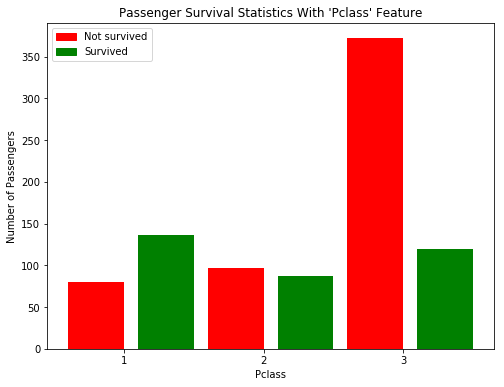

In [9]:
show_plot(data.copy(), "Pclass")

## Sex

Sex means sex of the passenger. In my opinion, 'Sex' is the very important feature. Because almost of female was survived. But, almost of male wasn't survived.

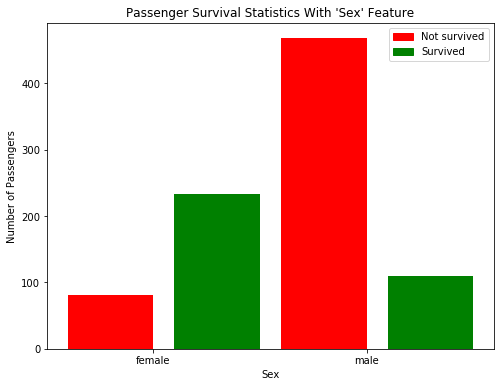

In [10]:
show_plot(data.copy(), "Sex")

## Age

Age means age of the passenger (Some entries contain `NaN`). In my opinion, age is important feature. Generally, middle age person's survived percentage is very poor. And teenager, younger than teenager person and senior have high survived percentage.

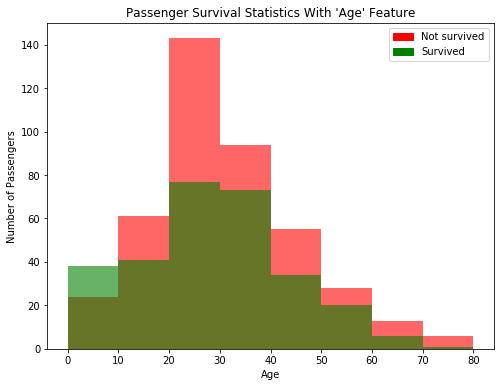

In [11]:
show_plot(data.copy(), "Age")

## SibSp

Sibsp means number of siblings and spouses of the passenger aboard. But, I don't think this feature is siginificant. But, generally, a passenger who has siblings or spouses has high survived percentage than other(a passenger who hasn't any sibling or spouse).

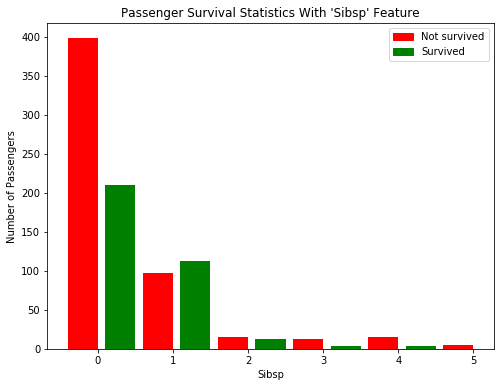

In [12]:
show_plot(data.copy(), "SibSp")

## Parch

Parch means number of parents and children of the passenger aboard. In my opinion, this feature is very similar to Sibsp feature. A person who has parents or children have more survived percentage than other(a passenger don't have parents or children of the aboard).

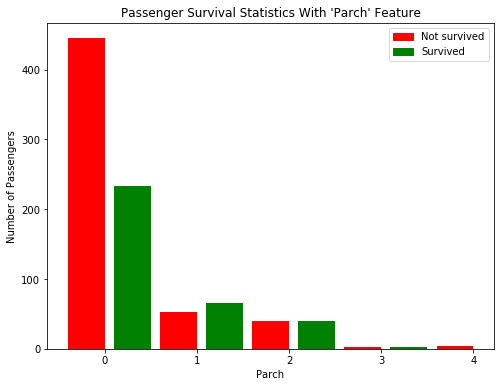

In [13]:
show_plot(data.copy(), "Parch")

## Fare

Fare means fare paid by the passenger. Before this project, I thought that fare is most important feature. But almost of people have less than 50. So, I think it isn't siginificant feature in this range. But, it can be use important feature in high fare range.

In [14]:
show_stats(data.copy(), "Fare", ["Fare <= 50"])

There are 731 data points (82.04%) matching the filter criteria.


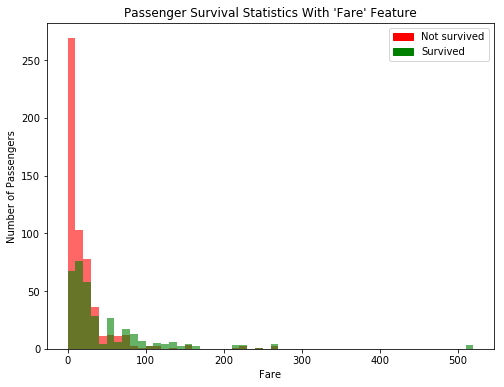

In [15]:
show_plot(data.copy(), "Fare")

# Conclusion
----

According to analysis, 'age' and 'Sex' are siginificant feature. Also, 'Pclass', 'SibSp', 'Parch' and 'Fare' can effect to result. So, we can expect a woman who had first class ticket would be survived

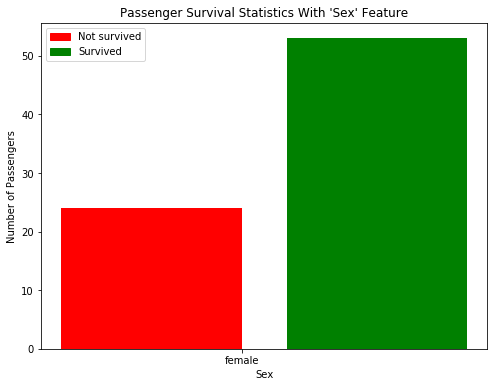

In [16]:
show_plot(data.copy(), "Sex", ["Age <= 20", "Sex == 'female'"])

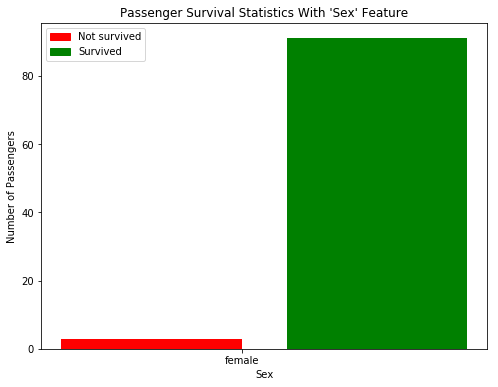

In [17]:
show_plot(data.copy(), "Sex", ["Pclass == 1", "Sex == 'female'"])

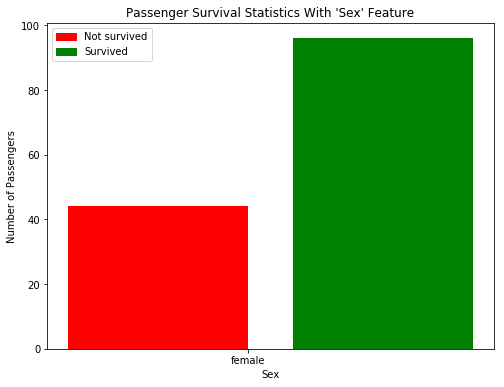

In [18]:
show_plot(data.copy(), "Sex", ["SibSp >= 1", "Sex == 'female'"])

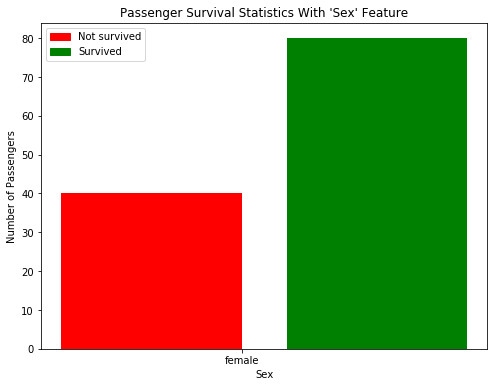

In [19]:
show_plot(data.copy(), "Sex", ["Parch >= 1", "Sex == 'female'"])

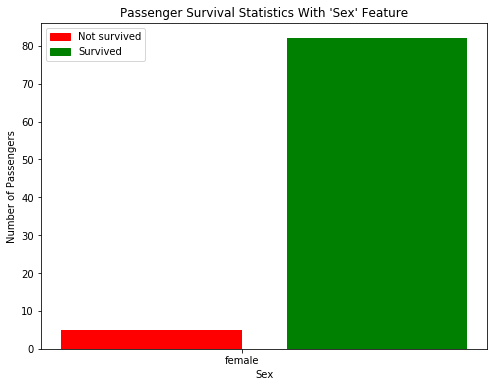

In [20]:
show_plot(data.copy(), "Sex", ["Fare >= 50", "Sex == 'female'"])